## AI Problem

 we will be using the **Big Mart Sales Prediction** problem from the Analytics Vidhya Data Hack platform.

Link to competition: https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement

### Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

### Data Dictionary

We have train and test data set, train data set has both input and output variable(s). Test data has only input variables.

| Variable |	Description |
|:----|:----|
| Item_Identifier |	Unique product ID |
| Item_Weight |	Weight of product |
| Item_Fat_Content | Whether the product is low fat or not |
| Item_Visibility | The % of total display area of all products in a store allocated to the particular product |
| Item_Type | The category to which the product belongs |
| Item_MRP | Maximum Retail Price (list price) of the product |
| Outlet_Identifier	| Unique store ID |
| Outlet_Establishment_Year |	The year in which store was established |
| Outlet_Size |	The size of the store in terms of ground area covered |
| Outlet_Location_Type |	The type of city in which the store is located | 
| Outlet_Type |	Whether the outlet is just a grocery store or some sort of supermarket |
| Item_Outlet_Sales |	Sales of the product in the particular store. This is the outcome variable to be predicted. |
 

## Basic Data Exploration

We will start with importing the necessary modules - `Numpy`, `Pandas`, `Matplotlib` and `Seaborn`

In [87]:
# Import all the necessary modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


Let us make use of pandas to read the train and test csv files to a dataframe 

In [88]:
# Reading the dataset into train and test dataframes

train_df=pd.read_csv("train_v9rqX0R.csv")
test_df=pd.read_csv("test_AbJTz2l.csv")


#### Shape of the dataset

As soon as we upload a dataset, the very first step is to explore the data and have understanding of the data. Let us start with some basic ones first.

We can get the shape of the train and test data which will help us understand the number of rows and columns in the dataset.

In [89]:
# Train dataset shape
train_df.shape


(8523, 12)

In [90]:
# Test dataset shape

test_df.shape

(5681, 11)

Now let us look at the top few rows of the dataset to get some more understanding of the data.

In [91]:
# Look at the top few rows of train set

train_df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [92]:
# Look at the top few rows of the test set

test_df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


#### Data Types

We know that the dataset has both numerical and categorical features. Now let us check the datatypes of these columns. 

We can make use of `dtypes` in pandas to do the same.

In [93]:
# Data types of all columns

train_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Now let us get the unique number of values in each of the columns

In [94]:
# Unique values in each of the columns

train_df.nunique()


Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Based on the above two analysis, let us categorize the numerical and categorical features. 

In [95]:
# for col in train_df.columns:
#     if train_df[col].dtypes=='object':
#             print(col)
           #
[col for col in train_df.columns if train_df[col].dtypes!='object']

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [96]:
# numerical columns
num_cols=['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year']



# categorical columns

cat_cols=[col for col in train_df.columns if train_df[col].dtypes=='object']

# target column
target="Item_Outlet_Sales"


#### Missing values and outliers

The dataset can also have some missing values. We need check whether there are any missing values in our dataset.

In [97]:
# Check for missing values

train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Missing values are present in two columns. 

Now let us check whether there are any outliers in the numerical columns.

C:\Users\91805\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


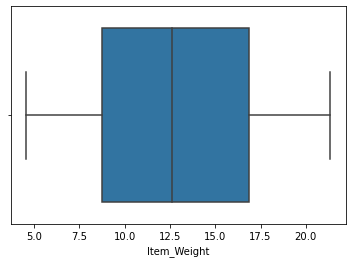

C:\Users\91805\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


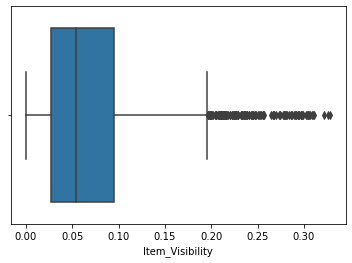

C:\Users\91805\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


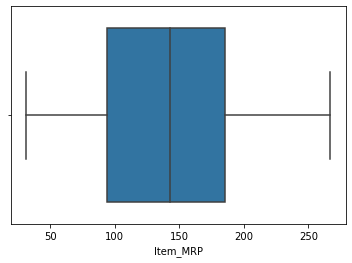

C:\Users\91805\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


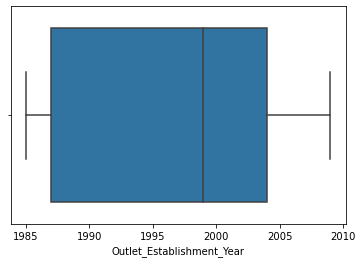

In [98]:
# Check for outliers using boxplot on all numerical features

## exterm values
for col in num_cols:
    sns.boxplot(train_df[col])
    plt.show()
    

We can see that outliers are preent in the `Item_Visibility` column and other columns dont have any outliers. Let us do truncation to treat the outliers in train and test set.

In [99]:
# Correcting for outliers in Item_Visibility - greater than 0.2
# Correct on training data

train_df['Item_Visibility'][train_df['Item_Visibility']>0.2]=0.2
# Correct on testing data
test_df['Item_Visibility'][test_df['Item_Visibility']>0.2]=0.2

C:\Users\91805\AppData\Local\Temp\ipykernel_17584\2581335248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Item_Visibility'][train_df['Item_Visibility']>0.2]=0.2
C:\Users\91805\AppData\Local\Temp\ipykernel_17584\2581335248.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Item_Visibility'][test_df['Item_Visibility']>0.2]=0.2


C:\Users\91805\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

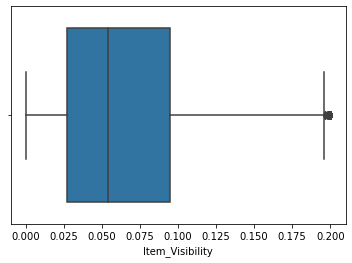

In [100]:
# Use boxplot to check that the outliers are removed

sns.boxplot(train_df['Item_Visibility'])

#### Correlation

Correlation analysis will help us know which features are correlated with each other. Let us analyse the same now.

In [101]:
# Get the correlation of all numerical features
train_df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.013719,0.027141,-0.011588,0.014123
Item_Visibility,-0.013719,1.000000,-0.001128,-0.064954,-0.118935
Item_MRP,0.027141,-0.001128,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.064954,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.118935,0.567574,-0.049135,1.000000


#### Descriptive Statistics - Target Exploration

Now let us move to descriptive analysis. We can start with understanding the `target` column.

In [102]:
# Describe the target column

train_df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

C:\Users\91805\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

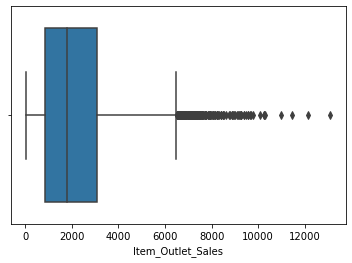

In [103]:
# Do a box plot on the target

sns.boxplot(train_df['Item_Outlet_Sales'])

Now let us get the summary statistics for the other numerical columns as well in our dataset.

In [104]:
# Describe other numerical features of the dataset
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.065373,140.992782,1997.831867,2181.288914
std,4.643456,0.049020,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.200000,266.888400,2009.000000,13086.964800


In [105]:
for col in cat_cols:
    display(col)
    print(train_df[col].value_counts())
    print("-"*30)

'Item_Identifier'

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
------------------------------


'Item_Fat_Content'

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
------------------------------


'Item_Type'

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
------------------------------


'Outlet_Identifier'

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
------------------------------


'Outlet_Size'

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
------------------------------


'Outlet_Location_Type'

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
------------------------------


'Outlet_Type'

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64
------------------------------


#### Univariate Plots

Now that we have understood the numerical features distribution, let us check the distribution of categorical features using univariate plots of the count.

We will use `seaborn` library to do the same.

C:\Users\91805\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


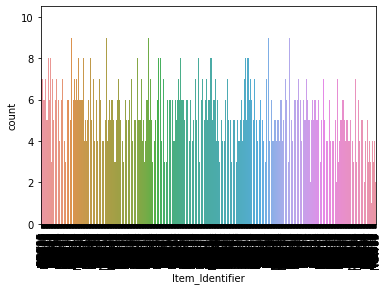

C:\Users\91805\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


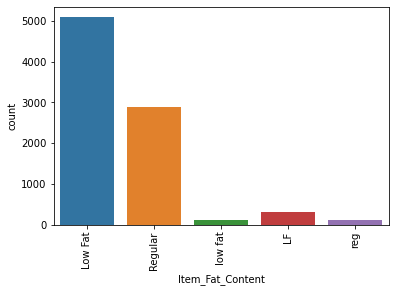

C:\Users\91805\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


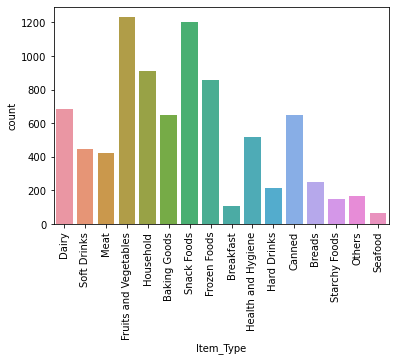

C:\Users\91805\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


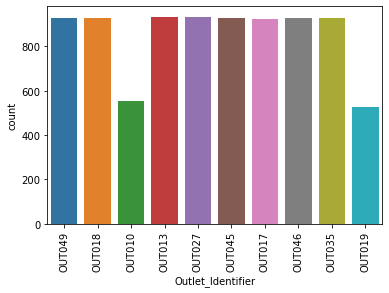

C:\Users\91805\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


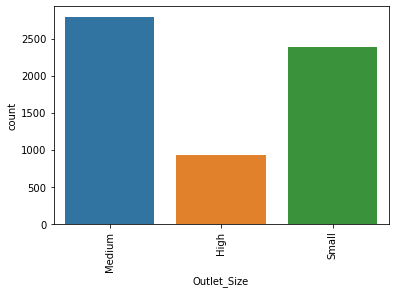

C:\Users\91805\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


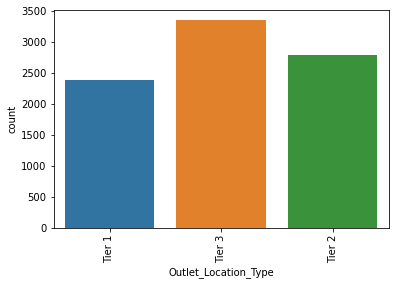

C:\Users\91805\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


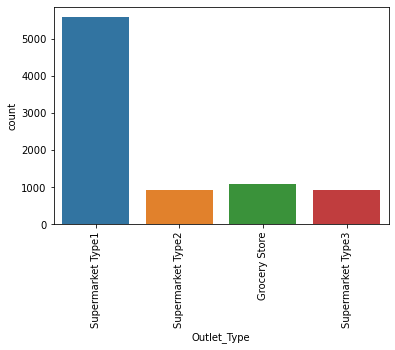

In [106]:
# Univariate plots on categorical variables - remove greater than 30 uniques
# Rotate the x-axis label

for col in cat_cols:
    sns.countplot(train_df[col])
    plt.xticks(rotation=90)
    plt.show()
    


#### Bivariate Plots

In this section, we can see how two variables are distributed with respect to each other. Since `Item_Outlet_Sales` is our target, let us check the distribution of some numerical features with the target.

Let us start with `Item_MRP`

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

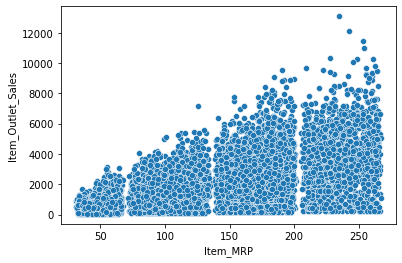

In [107]:
# scatter plot on "Item_MRP" and target

sns.scatterplot(x='Item_MRP',y=target,data=train_df)


We see a positive correlation for `Item_MRP` with our target. Now let us do the same for `Item_Visibility`.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

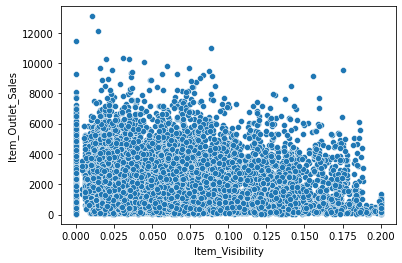

In [108]:
# scatter plot on "Item_Visibility" and target


sns.scatterplot(x='Item_Visibility',y=target,data=train_df)

## Data Preprocessing

Now that we understood our data using exploratory analysis, let us do some data preprocessing steps so that the data is ready for modeling.

#### Handling Missing Values

We already saw that there are missing values in two columns. 

In [109]:
# Check the missing values in the train set

train_df.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [110]:
# Check the missing values in the test set
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Now let us do some preprocessing to impute the missing values. 

`Item_Weight` is a numerical column and so let us get the mean value and impute the missing values with the mean value.

In [111]:
# Replace with mean for "Item_Weight"
# Get the mean value

mean_value=train_df['Item_Weight'].mean()
mean_value

12.857645184136183

In [112]:
# Fill the missing values on train_df 
train_df['Item_Weight'].fillna(mean_value,inplace=True)

# Fill the missing values on test_df

test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean(),inplace=True)

`Outlet_Size` is a categorical column and so let us take the `mode` value for the column and use it to fill the missing values.

In [113]:
# Replace with mode for "Outlet_Size"
# Get the mode value

train_df['Outlet_Size'].mode()[0]

'Medium'

In [114]:
# Fill the missing values on train_df 

train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode()[0],inplace=True)

# Fill the missing values on test_df

test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].mode()[0],inplace=True)

In [115]:
# Check the missing values to make sure that they are filled

train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [116]:
test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#### Handling Categorical Features

Most of the ML models only accept numerical values as input features and so we need to convert the categorical features into numerical ones. There are several ways to do the same. 

In this example, we will do `Label Encoding` to convert the categorical feature into numerical features. Different encoding methods have differnt pros and cons. We need to choose the ones that is suited for the algorithm and also for the dataset.

In [117]:
# Import the scikit learn preprocessing module for Label encoding

from sklearn.preprocessing import LabelEncoder


# Label encode the categorical features
# Fit transform on train data
# Transform on test data


for col in cat_cols:
    lbs=LabelEncoder()
    train_df[col]=lbs.fit_transform(train_df[col].astype(str).values)
    test_df[col]=lbs.fit_transform(test_df[col].astype(str).values)



In [118]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


#### Feature Transformation

In addition to given features, we also create new features based on transformation of existing features. 

We will create an interaction feature based on the two features - `Item_MRP` and `Item_Visibility`

In [119]:
# Let us add a new derived_feature1 which is Item_MRP * Item_Visibility

train_df['derived_feature_1']=train_df['Item_MRP']*train_df['Item_Visibility']
test_df['derived_feature_1']=test_df['Item_MRP']*test_df['Item_Visibility']

In [120]:
# Check the top few rows

test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,derived_feature_1
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1,0.815960
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1,3.355497
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0,24.072612
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1,2.385724
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3,27.779517


#### Data Split for Model Building

Before building the model, we need to split the data into training and validation sample. Validation sample will help us evaluate the different models and choose the best one.

We will use all our numerical features and categorical features along with the new derived feature to build our models.

In [121]:
# columns to use for model building

final_col=num_cols+cat_cols+["derived_feature_1"]

In [122]:
final_col

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'derived_feature_1']

Let us get the input and output features first before splitting the data.

In [123]:
# Prepare X and y variables for train  set 

X=train_df[final_col]
y=train_df['Item_Outlet_Sales']
# Prepare the test_X set


test_X=test_df[final_col]

In [124]:
# Do train and validation split using scikit learn model selection
from sklearn.model_selection import train_test_split


# Split the X and y with test size - 20%

train_x,val_x,train_y,val_y=train_test_split(X,y,test_size=.20)

In [125]:
# Check the shape of train and val features
train_x.shape,val_x.shape,train_y.shape,val_y.shape

((6818, 12), (1705, 12), (6818,), (1705,))

In [126]:
test_X.shape

(5681, 12)

## Model Building

Now we can proceed to building our models.

We will build two models.
* Linear Regression
* Decision Tree Regressor.

We will be using the `scikit-learn` package to build our models.

#### Linear Regression

Let us first build our linear regression model.

In [127]:
# Build Linear Regression Model using scikit learn linear model
from sklearn.linear_model import LinearRegression

# Fit the linear regression model
lr=LinearRegression()
lr.fit(train_x,train_y)

LinearRegression()

Now let us use the model to do the predictions on the validation and the test sample.

In [128]:
# Do predictions for validation data

pred_sales_lr=lr.predict(val_x)
pred_sales_lr

array([3123.69884472, 2307.94409321, 1100.00847902, ...,   69.78928822,
       2151.46576324, 1157.75294716])

#### Decision Tree

Now we can build the decision tree model and do predictions.

In [129]:
# Build Decision Tree Regressor model from scikit learn tree module

# Fit the decision tree model

from sklearn.tree import DecisionTreeRegressor


dt=DecisionTreeRegressor()
dt.fit(train_x,train_y)


DecisionTreeRegressor()

In [130]:
# Do predictions on val data

pred_sales_dt=dt.predict(val_x)
pred_sales_dt

array([5298.4364, 2745.0934,  517.3266, ...,  193.082 , 2769.728 ,
       1358.232 ])

## Model Evaluation

Once the model building is done, we need to evaluate the models and finalize a model for deployment. Depending on the problem, we will need to choose the evaluation metrics. 

Since this is a regression problem, let us use `RMSE` and `R2` value for our evaluation.

#### Root Mean Squared Error

In [131]:
# Evaluation - mean_squared_error for linear model
from sklearn.metrics import mean_squared_error
# Linear model evaluation with squared  

mean_squared_error(val_y,pred_sales_lr,squared=False)

1214.9535758193442

In [132]:
# mean squared_error for tree model

mean_squared_error(val_y,pred_sales_dt,squared=False)

1676.099959896526

#### R2 Score

In [133]:
# Evaluation - r2 score

from sklearn.metrics import r2_score
# Linear model evaluation

r2_score(val_y,pred_sales_lr)

0.5055991200478362

In [134]:
# Tree model evaluation
r2_score(val_y,pred_sales_dt)

0.05906483537337459

## Model Inferencing

In this case, Linear model is performing better than the Decision tree model.

Now let us inference the linear model on the test data. 

In [135]:
# Do predictions on test sample


pred_test_y=lr.predict(test_df)
pred_test_y

C:\Users\91805\anaconda31\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([192036.07699824, 150434.13196781, 172461.44697062, ...,
       156318.65080792, 176406.49248112, 153708.67348551])

Some steps that may help to improve the performance are
* Using more features
* Hyperparameter tuning
* Using other ML algorithms etc

The final model can be used for deployment.